In [ ]:
import pandas as pd

# Get train and test datasets and combine
df = pd.read_csv('/content/CONDA_train.csv')
df1  = pd.read_csv('/content/CONDA_valid.csv')

df = pd.concat([df, df1])
print(len(df))
df = df[['utterance', 'intentClass']]
df = df.dropna()
df = df.reset_index()
df.head()

35895


,index,utterance,intentClass
0,0,wow!,O
1,1,WTF,O
2,2,wpe wpe,O
3,3,hahaha,O
4,4,wtf,O


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['utterance'])
print(vectorizer.get_stop_words()) 

None


In [ ]:
print(X[0])

  (0, 10662)	1.0


In [ ]:
feature_names = vectorizer.get_feature_names() 
#get tfidf vector for first document 
first_document_vector= X[26] 
#print the scores 
df2 = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 
df2.sort_values(by=["tfidf"],ascending=False)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,tfidf
invoker,0.648631
mid,0.485939
noob,0.483833
gg,0.330222
00,0.000000
...,...
frank,0.000000
frankfurt,0.000000
fraps,0.000000
frduikfaimcl,0.000000


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize dataset
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['utterance'])
df2 = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names()) 
df2.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,000000000000000,0162282307,025,040,06,0coins,0o,0v5,...,ｐｅｒｕ,ｒａｍｐａｇｅ,ｓｈｅ,ｓｉｓｉｓｉｎｇ,ｓｐｅａｋ,ｓｔｏｐ,ｔｏ,ｔｒｙｉｎｇ,ｖｉｖａ,ｘｄｘｄｘ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2['intentClass'] = df['intentClass']
df2.head()

,00,000,000000000000000,0162282307,025,040,06,0coins,0o,0v5,...,ｒａｍｐａｇｅ,ｓｈｅ,ｓｉｓｉｓｉｎｇ,ｓｐｅａｋ,ｓｔｏｐ,ｔｏ,ｔｒｙｉｎｇ,ｖｉｖａ,ｘｄｘｄｘ,intentClass
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,O
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,O
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,O
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,O
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,O


In [ ]:
def list_token(doc , ack):
 temp1=pd.DataFrame(doc).transpose()
 temp2 = temp1.loc[:, (temp1 != 0).any(axis=0)]
 if ack==0:
  freq = temp2.drop(['intentClass'], axis=1)
 else:
  freq = temp2.drop(['intentClass'], axis=1)
 list_words =freq.columns.tolist()
 return list_words


word_cl_dic={}
n = len(df2)
for i in range(0,len(df2)):
    dt=df2.iloc[i,]
    lst_words=list_token(dt,0)
    cl=dt['intentClass']
    for w in set(lst_words):
        word_cl_dic[w]=word_cl_dic.get(w,{})
        word_cl_dic[w][cl]=word_cl_dic[w].get(cl,0)
        word_cl_dic[w][cl]+=1

print(word_cl_dic)

KeyboardInterrupt: ignored

In [ ]:
word_features={}
k=1000000

num_doc_cl=df.groupby(['intentClass'])['utterance'].count()
print(num_doc_cl)

In [ ]:
print(len(df))

In [ ]:
import operator
from math import log

# Calculate PMI scores for each word based on class
for w in word_cl_dic.keys():
    dic = word_cl_dic[w]
    n_kw=0
    for cl in dic.keys():
        # Number of documents in the training set where the word occurs
        n_kw+=dic[cl]
    for cl in dic.keys():
        word_features[cl]=word_features.get(cl,[])
        n_kw_cl=dic[cl]
        n_dev_cl=num_doc_cl.loc[cl]
        p_w=n_kw/n
        p_cl = n_dev_cl/n
        p_w_cl= n_kw_cl/n
        
        pmi=log((p_w_cl)/(p_w*p_cl))
        
        if len(word_features[cl])<k:
            word_features[cl].append((w,pmi))
            if len(word_features[cl])==k:
                word_features[cl].sort(key=operator.itemgetter(1),reverse=True)                
        else:
            if word_features[cl][k-1][1]<pmi:
                word_features[cl][k-1]= (w,pmi)
                word_features[cl].sort(key=operator.itemgetter(1),reverse=True)    

print(word_features)

In [ ]:
def Sort_Tuple(tup):
 
    # reverse = None (Sorts in Ascending order)
    # key is set to sort using second element of
    # sublist lambda has been used
    tup.sort(key = lambda x: x[1])
    return tup
 
# printing the sorted list of tuples
print([i for i in Sort_Tuple(word_features['O']) if i[1] < -0.7])

In [ ]:
# Create list of stopwords for each class based on PMI threshold
stop_o = [i[0] for i in Sort_Tuple(word_features['O']) if i[1] < -0.5]
stop_i = [i[0] for i in Sort_Tuple(word_features['I']) if i[1] < -0.5]
stop_a = [i[0] for i in Sort_Tuple(word_features['A']) if i[1] < -0.5]
stop_e = [i[0] for i in Sort_Tuple(word_features['E']) if i[1] < -0.5]


df = pd.read_csv('/content/CONDA_train.csv')
df = df[['utterance', 'intentClass']]
df = df.dropna()
df = df.reset_index()

count = 0

# Trim each example in dataset based on stop words list 
for i in range(len(df)):
  if df['intentClass'][i] == 'O':
    resultwords  = [word for word in df['utterance'][i].split() if word.lower() not in stop_o]
    if len(resultwords) > 0:
      df['utterance'][i] = ' '.join(resultwords)
    else:
      count+=1
  elif df['intentClass'][i] == 'I':
    resultwords  = [word for word in df['utterance'][i].split() if word.lower() not in stop_i]
    if len(resultwords) > 0:
      df['utterance'][i] = ' '.join(resultwords)
    else:
      count+=1
  elif df['intentClass'][i] == 'A':
    resultwords  = [word for word in df['utterance'][i].split() if word.lower() not in stop_a]
    if len(resultwords) > 0:
      df['utterance'][i] = ' '.join(resultwords)
    else:
      count+=1
  else:
    resultwords  = [word for word in df['utterance'][i].split() if word.lower() not in stop_e]
    if len(resultwords) > 0:
      df['utterance'][i] = ' '.join(resultwords)
    else:
      count+=1

print(count)
# Save as new dataset
df.to_csv('CONDA_train_pmi_trimmed.csv')

In [ ]:

df = pd.read_csv('/content/CONDA_valid.csv')
df = df[['utterance', 'intentClass']]
df = df.dropna()
df = df.reset_index()

count = 0

for i in range(len(df)):
  if df['intentClass'][i] == 'O':
    resultwords  = [word for word in df['utterance'][i].split() if word.lower() not in stop_o]
    if len(resultwords) > 0:
      df['utterance'][i] = ' '.join(resultwords)
    else:
      count+=1
  elif df['intentClass'][i] == 'I':
    resultwords  = [word for word in df['utterance'][i].split() if word.lower() not in stop_i]
    if len(resultwords) > 0:
      df['utterance'][i] = ' '.join(resultwords)
    else:
      count+=1
  elif df['intentClass'][i] == 'A':
    resultwords  = [word for word in df['utterance'][i].split() if word.lower() not in stop_a]
    if len(resultwords) > 0:
      df['utterance'][i] = ' '.join(resultwords)
    else:
      count+=1
  else:
    resultwords  = [word for word in df['utterance'][i].split() if word.lower() not in stop_e]
    if len(resultwords) > 0:
      df['utterance'][i] = ' '.join(resultwords)
    else:
      count+=1

print(count)
df.to_csv('CONDA_valid_pmi_trimmed.csv')

In [ ]:
import pandas as pd

# Get training dataset
df = pd.read_csv('/content/CONDA_train.csv')

df = df[['utterance', 'intentClass']]
df = df.dropna()
df = df.reset_index()
df.head()

,index,utterance,intentClass
0,0,wow!,O
1,1,WTF,O
2,2,wpe wpe,O
3,3,hahaha,O
4,4,wtf,O


In [ ]:
l = []
l2 = []

# Calculate utterance length and number of utterances
for i in range(len(df)):
   utteranceL = df['utterance'][i].split()
   l2.append(utteranceL.count('[SEPA]') + 1)
   utteranceL = [i for i in utteranceL if i != '[SEPA]']
   df['utterance'][i] = " ".join(str(x) for x in utteranceL)
   l.append(len(utteranceL))

df['utteranceLength'] = l
df['utterances'] = l2
df.head()

<ipython-input-47-6f855c7d7b66>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['utterance'][i] = " ".join(str(x) for x in utteranceL)


,index,utterance,intentClass,utteranceLength,utterances
0,0,wow!,O,1,1
1,1,WTF,O,1,1
2,2,wpe wpe,O,2,1
3,3,hahaha,O,1,1
4,4,wtf,O,1,1


Text(0.5, 1.0, 'Distribution of utterances for class O')

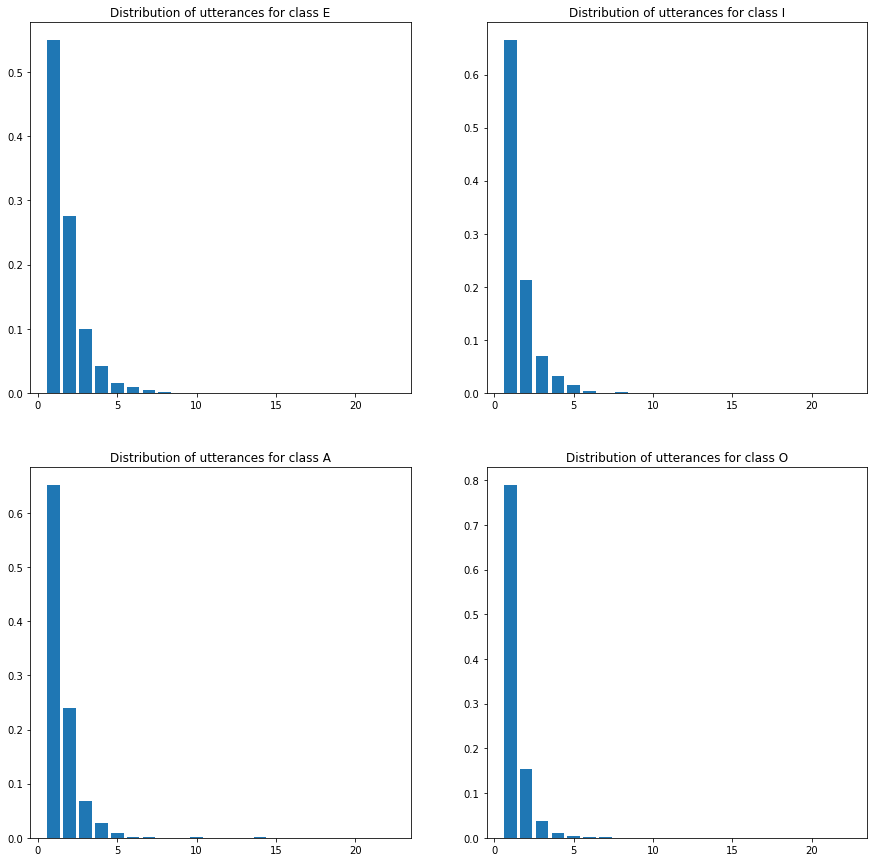

In [ ]:
import matplotlib.pyplot as plt
from pyparsing import countedArray

# Get distribution of number of utterances in groupby object
gb = df.groupby('intentClass')['utterances'].value_counts(normalize=True).unstack(fill_value=0)

num = []
countE = []
countI = []
countA = []
countO = []

for col,data in gb.iteritems():
  num.append(col)
  countE.append(data['E'])
  countI.append(data['I'])
  countA.append(data['A'])
  countO.append(data['O'])

# Plot distribution of number of utterances for each class
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].bar(num, countE)
axs[0, 0].set_title('Distribution of utterances for class E')
axs[0, 1].bar(num, countI)
axs[0, 1].set_title('Distribution of utterances for class I')
axs[1, 0].bar(num, countA)
axs[1, 0].set_title('Distribution of utterances for class A')
axs[1, 1].bar(num, countO)
axs[1, 1].set_title('Distribution of utterances for class O')

Text(0.5, 1.0, 'Distribution of utterance lengths for class O')

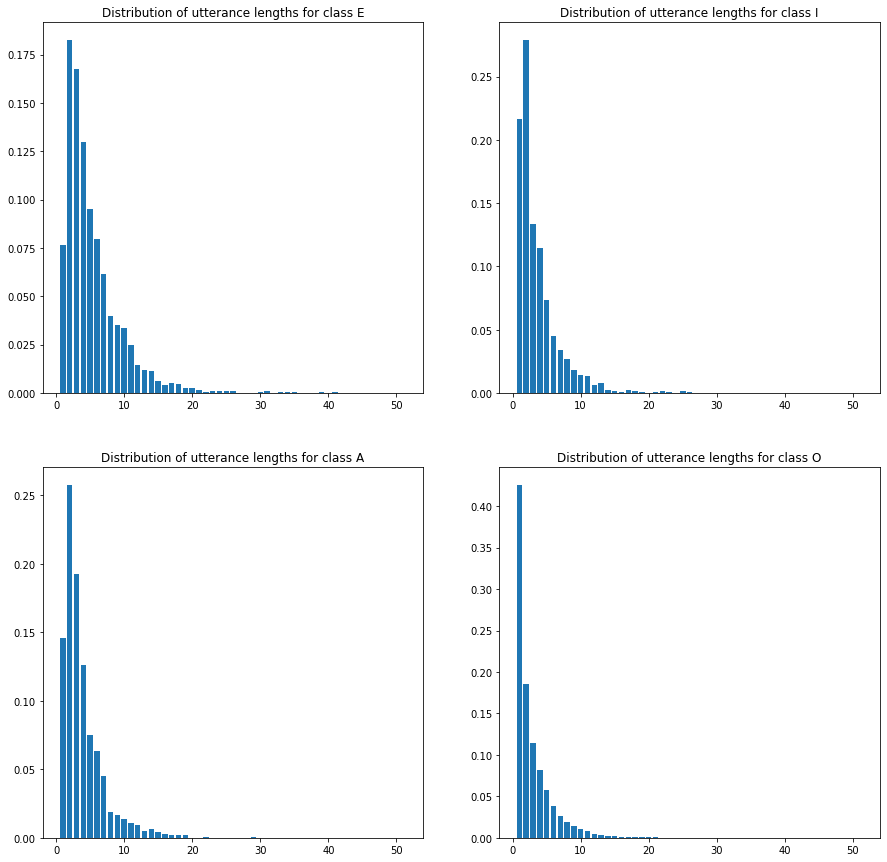

In [ ]:
from pyparsing import countedArray

# Get distribution of utterance lengths in groupby object
gb = df.groupby('intentClass')['utteranceLength'].value_counts(normalize=True).unstack(fill_value=0)

num = []
countE = []
countI = []
countA = []
countO = []

for col,data in gb.iteritems():
  num.append(col)
  countE.append(data['E'])
  countI.append(data['I'])
  countA.append(data['A'])
  countO.append(data['O'])

# Plot distribution of utterance lengths for each class
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].bar(num, countE)
axs[0, 0].set_title('Distribution of utterance lengths for class E')
axs[0, 1].bar(num, countI)
axs[0, 1].set_title('Distribution of utterance lengths for class I')
axs[1, 0].bar(num, countA)
axs[1, 0].set_title('Distribution of utterance lengths for class A')
axs[1, 1].bar(num, countO)
axs[1, 1].set_title('Distribution of utterance lengths for class O')

In [ ]:
# Get average utterances and utterance lengths per class
rint(df.groupby('intentClass')['utterances'].mean())
print()
print(df.groupby('intentClass')['utteranceLength'].mean())

intentClass
A    1.518325
E    1.760488
I    1.539007
O    1.297672
Name: utterances, dtype: float64

intentClass
A    3.875509
E    5.286281
I    3.654255
O    2.932866
Name: utteranceLength, dtype: float64


O


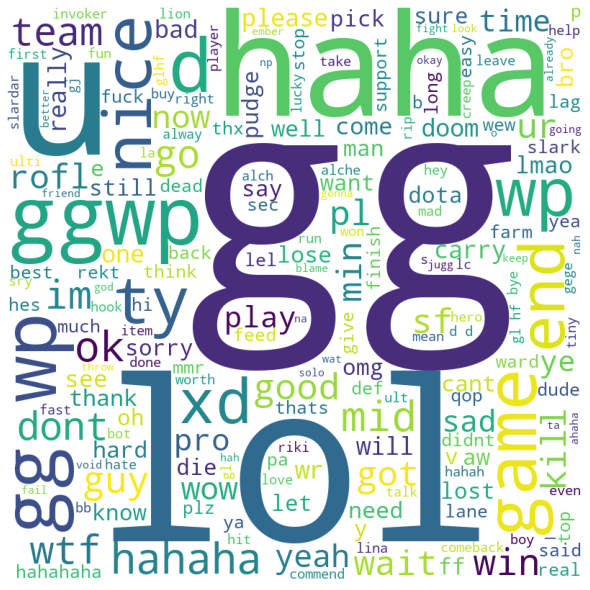

E


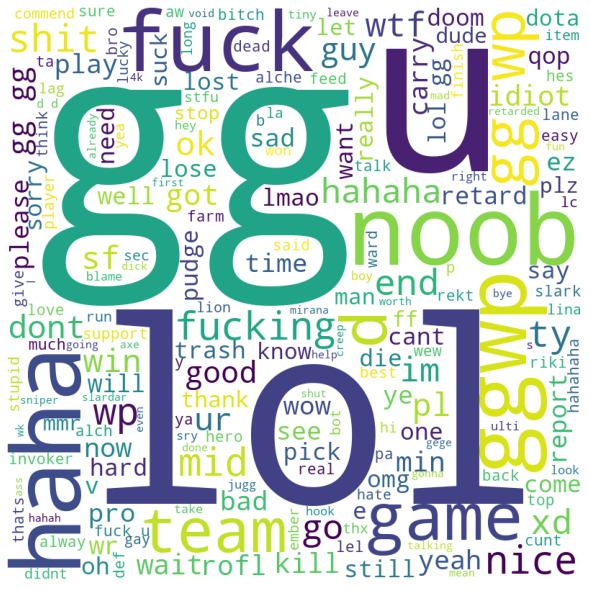

A


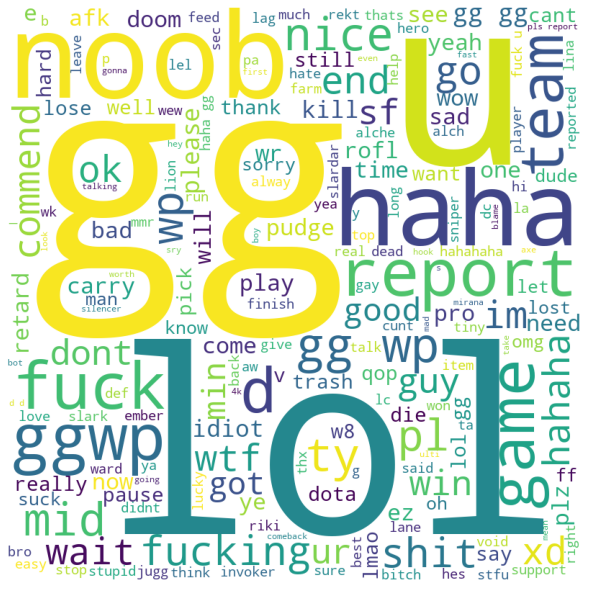

I


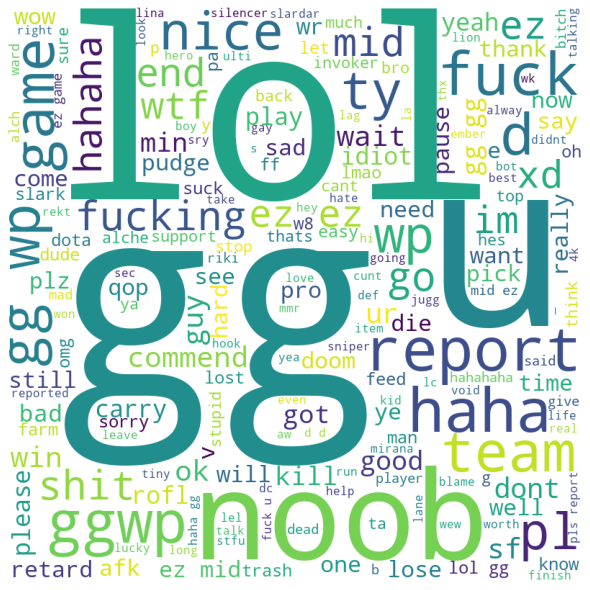

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file

for cat in df.intentClass.unique():
  print(cat)
  df2 = df.loc[df['intentClass'] == cat]
  for val in df2['utterance']:
      
      # typecaste each val to string
      val = str(val)
  
      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "
  
  wordcloud = WordCloud(width = 800, height = 800,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)
  
  # plot the WordCloud image                      
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  
  plt.show()

In [ ]:
gb = df.groupby('intentClass')['utterance'].apply(' '.join).reset_index()

print(gb)

  intentClass                                          utterance
0           A  gg report my team rat please g? Pls report sb ...
1           E  i cant play with 4 trash my arrows always dece...
2           I  ez mid ez ez game Thats all I gotta say Drow 2...
3           O  wow! WTF wpe wpe hahaha wtf bg =) ty hahah gh ...


In [ ]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

# Use bert sentence transformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

# Get document level embeddings
document_embeddings = sbert_model.encode(gb['utterance'])

# Calculate similarity matrices
pairwise_similarities=cosine_similarity(document_embeddings)
pairwise_differences=euclidean_distances(document_embeddings)

print(pairwise_similarities)
print()
print(pairwise_differences)

[[0.9999999  0.77343774 0.7558209  0.775679  ]
 [0.77343774 1.         0.795871   0.75006443]
 [0.7558209  0.795871   0.99999994 0.76032054]
 [0.775679   0.75006443 0.76032054 1.0000001 ]]

[[ 0.       10.534051 10.932145 10.314381]
 [10.534051  0.       10.049809 10.953794]
 [10.932145 10.049809  0.       10.723267]
 [10.314381 10.953794 10.723267  0.      ]]


In [ ]:
# Get embeddings for utterances
embeddings = sbert_model.encode(df['utterance'])
print(embeddings)

[[ 3.9183190e-01 -2.3265530e-01  2.2776561e+00 ...  1.7976077e-01
  -5.0571505e-02  9.5217280e-02]
 [ 5.2598953e-01 -3.2393247e-01  2.1377017e+00 ... -1.7489403e-01
  -3.2440221e-01 -2.3651049e-01]
 [ 4.6560061e-01 -3.4872851e-01  2.0232818e+00 ... -4.9317124e-01
   2.8328279e-01 -2.3174356e-01]
 ...
 [ 2.6120153e-01 -1.4123994e-01  2.3311493e+00 ...  2.4198651e-01
   9.2915855e-02 -2.4583245e-02]
 [ 4.0698335e-01  1.6451032e-01  1.8671861e+00 ... -4.7140121e-02
  -6.4226769e-02  2.7386621e-01]
 [-2.8431305e-01 -1.8281274e-02  2.2305677e+00 ...  6.3100457e-04
   1.5974997e-01  1.7453748e-01]]


In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# PCA to reduce to two dimensions
pca = PCA(n_components=2)
embeddings = pca.fit_transform(embeddings)
print(embeddings)

[[-6.117014   -1.0120014 ]
 [-3.0527437  -0.74407023]
 [-2.4408     -0.95788896]
 ...
 [-6.1382723  -2.127695  ]
 [-2.1544962  -0.2464365 ]
 [-5.8085136  -0.08263826]]


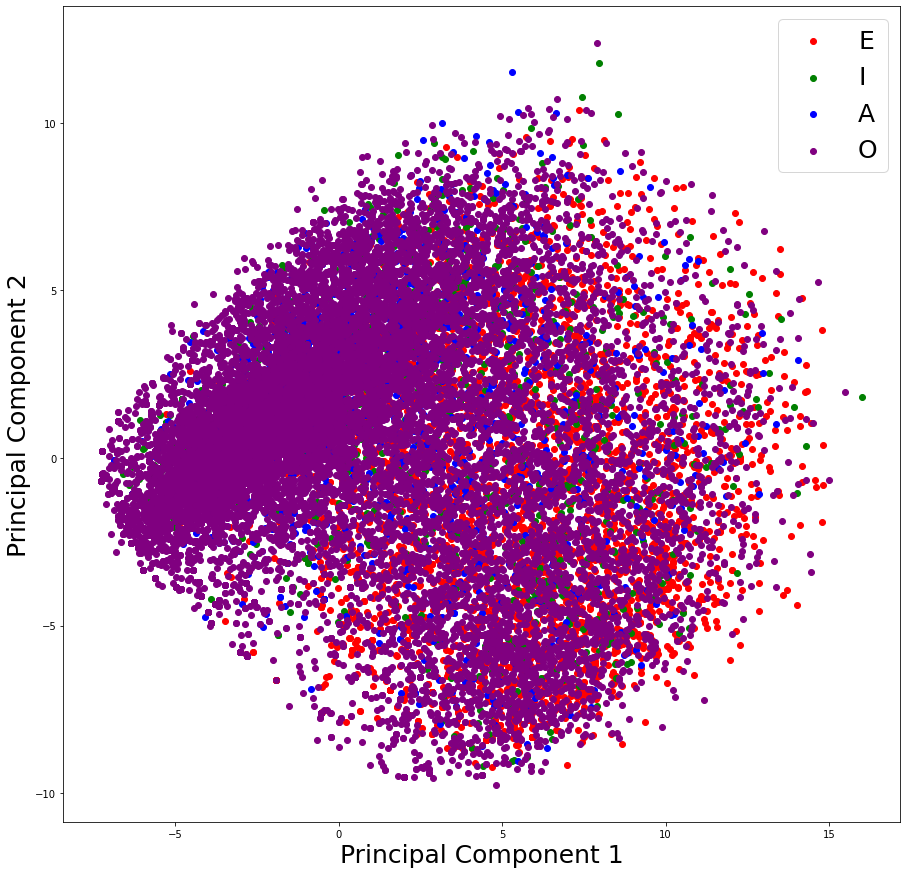

In [ ]:
# Get PCAs and labels
plot_df = pd.DataFrame(data = embeddings, columns = ['principal component 1', 'principal component 2'])
plot_df = pd.concat([plot_df, df[['intentClass']]], axis = 1)


# Plot points and label/color based on class
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 25)
ax.set_ylabel('Principal Component 2', fontsize = 25)
targets = ['E', 'I', 'A', 'O']
colors = ['r', 'g', 'b', 'purple']
for target, color in zip(targets,colors):
    indicesToKeep = plot_df['intentClass'] == target
    ax.scatter(plot_df.loc[indicesToKeep, 'principal component 1']
               , plot_df.loc[indicesToKeep, 'principal component 2']
               , c = color)
ax.legend(targets, fontsize=25)

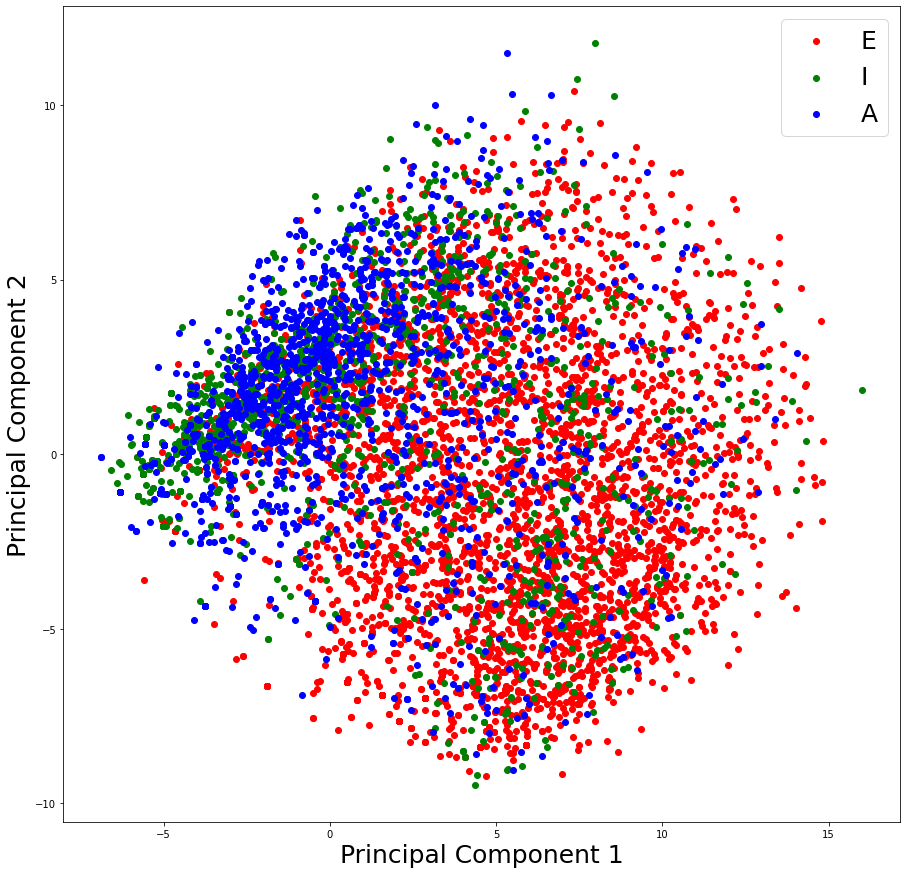

In [ ]:
# Remove O class and plot again
df = df[df.intentClass != 'O']
plot_df = pd.DataFrame(data = embeddings, columns = ['principal component 1', 'principal component 2'])
plot_df = pd.concat([plot_df, df[['intentClass']]], axis = 1)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 25)
ax.set_ylabel('Principal Component 2', fontsize = 25)
targets = ['E', 'I', 'A']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = plot_df['intentClass'] == target
    ax.scatter(plot_df.loc[indicesToKeep, 'principal component 1']
               , plot_df.loc[indicesToKeep, 'principal component 2']
               , c = color)
ax.legend(targets, fontsize=25)